In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
monday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-monday.pcap_Flow.csv")
monday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-monday-pvt.pcap_Flow.csv")
tuesday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-thursday.pcap_Flow.csv")
tuesday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-tuesday.pcap_Flow.csv")
wednesday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-tuesday.pcap_Flow.csv")
wednesday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-wednesday.pcap_Flow.csv")
thursday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-wednesday.pcap_Flow.csv")
thursday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-thursday.pcap_Flow.csv")
friday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-tcpdump-friday.pcap_Flow.csv")
friday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-tcpdump-pvt-friday.pcap_Flow.csv")



## **DATA PROCESSING**



In [ ]:
#join data sets, convert uppercase data to lowercase
data = pd.concat([monday_pub,monday_prv,tuesday_pub,tuesday_prv, wednesday_pub,
                  wednesday_prv, thursday_pub, thursday_prv, friday_pub, friday_prv], axis =0)
data = data.applymap(lambda s:s.lower() if type(s) == str else s)
data


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 pm,4308182,11,21,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 pm,102319,3,5,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 pm,119674949,89,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 pm,119999065,248,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 pm,110289343,19,16,...,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,192.168.3.30-192.168.101.125-53452-58425-6,192.168.3.30,53452,192.168.101.125,58425,6,19/07/2019 05:07:59 pm,15048093,4,1,...,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign,benign
2614,192.168.3.30-192.168.101.125-54174-48532-6,192.168.3.30,54174,192.168.101.125,48532,6,19/07/2019 07:04:08 pm,15058240,4,1,...,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign,benign
2615,192.168.3.30-192.168.101.125-35168-44591-6,192.168.3.30,35168,192.168.101.125,44591,6,19/07/2019 08:32:15 pm,15039436,4,1,...,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign,benign
2616,192.168.3.30-192.168.101.125-51298-22351-6,192.168.3.30,51298,192.168.101.125,22351,6,19/07/2019 07:12:49 pm,15054694,4,1,...,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign,benign


In [ ]:
data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,86691.000000,86691.000000,86691.000000,8.669100e+04,86691.000000,86691.000000,8.669100e+04,8.669100e+04,86691.000000,86691.000000,...,86691.000000,86691.0,8.669100e+04,8.669100e+04,8.669100e+04,8.669100e+04,8.669100e+04,8.669100e+04,8.669100e+04,8.669100e+04
mean,39742.167065,8125.916312,9.048010,2.151839e+07,737.011593,419.273039,5.993707e+04,4.163274e+04,230.462666,21.904604,...,696.410977,0.0,5.867621e+05,2.442647e+05,8.610962e+05,3.501332e+05,3.992249e+06,6.451986e+05,4.704861e+06,3.365484e+06
std,19083.538521,14074.370923,5.456012,4.233515e+07,17432.557442,9984.292911,2.118155e+06,8.081045e+05,931.454272,88.779449,...,17253.879117,0.0,3.000325e+06,1.278867e+06,3.839318e+06,2.270795e+06,1.158468e+07,2.748089e+06,1.290867e+07,1.094078e+07
min,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,36166.500000,53.000000,6.000000,3.800000e+02,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,47238.000000,1091.000000,6.000000,1.566900e+04,1.000000,3.000000,4.500000e+01,2.090000e+02,45.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,53346.000000,9002.000000,17.000000,5.025986e+06,9.000000,5.000000,6.150000e+02,4.840000e+02,122.000000,44.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65475.000000,65432.000000,17.000000,1.200000e+08,451234.000000,518384.000000,2.534673e+08,9.548315e+07,64440.000000,11584.000000,...,451234.000000,0.0,9.362586e+07,5.660562e+07,9.362586e+07,9.362586e+07,1.197569e+08,7.057240e+07,1.197569e+08,1.197569e+08


benign                63712
reconnaissance        11909
establish foothold     8604
lateral movement       2451
data exfiltration        15
Name: Stage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


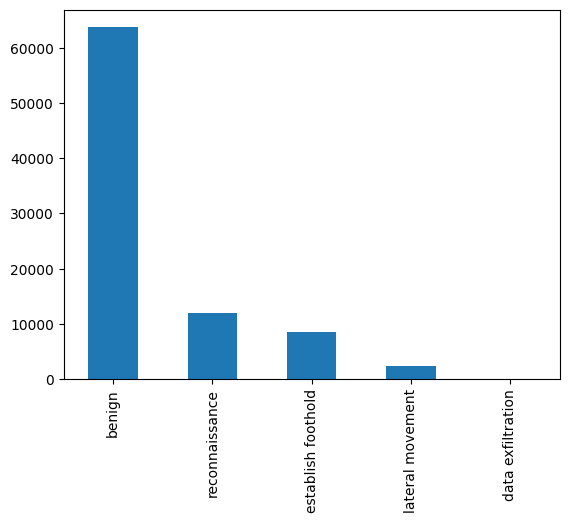

In [ ]:
#class label distribution
print(data.Stage.value_counts())
print(data.Stage.value_counts().plot(kind='bar'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86691 entries, 0 to 2617
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     86691 non-null  object 
 1   Src IP                      86691 non-null  object 
 2   Src Port                    86691 non-null  int64  
 3   Dst IP                      86691 non-null  object 
 4   Dst Port                    86691 non-null  int64  
 5   Protocol                    86691 non-null  int64  
 6   Timestamp                   86691 non-null  object 
 7   Flow Duration               86691 non-null  int64  
 8   Total Fwd Packet            86691 non-null  int64  
 9   Total Bwd packets           86691 non-null  int64  
 10  Total Length of Fwd Packet  86691 non-null  float64
 11  Total Length of Bwd Packet  86691 non-null  float64
 12  Fwd Packet Length Max       86691 non-null  float64
 13  Fwd Packet Length Min       8669

In [ ]:
#check for missing data
data.isna().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Activity    0
Stage       0
Length: 85, dtype: int64

In [ ]:
#total missing data
(data.isna().sum()).sum()

0

In [ ]:
#delete duplicate data
data.drop_duplicates()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 pm,4308182,11,21,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 pm,102319,3,5,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 pm,119674949,89,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 pm,119999065,248,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 pm,110289343,19,16,...,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,192.168.3.30-192.168.101.125-53452-58425-6,192.168.3.30,53452,192.168.101.125,58425,6,19/07/2019 05:07:59 pm,15048093,4,1,...,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign,benign
2614,192.168.3.30-192.168.101.125-54174-48532-6,192.168.3.30,54174,192.168.101.125,48532,6,19/07/2019 07:04:08 pm,15058240,4,1,...,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign,benign
2615,192.168.3.30-192.168.101.125-35168-44591-6,192.168.3.30,35168,192.168.101.125,44591,6,19/07/2019 08:32:15 pm,15039436,4,1,...,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign,benign
2616,192.168.3.30-192.168.101.125-51298-22351-6,192.168.3.30,51298,192.168.101.125,22351,6,19/07/2019 07:12:49 pm,15054694,4,1,...,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign,benign


In [ ]:
#columns have only 1 unique value
cols=data.columns
unique_val_col =[]
for col in cols:
  if data[col].nunique() ==1:
    unique_val_col.append(col)
unique_val_col


['Fwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Bwd Bytes/Bulk Avg',
 'Bwd Packet/Bulk Avg',
 'Bwd Bulk Rate Avg',
 'FWD Init Win Bytes',
 'Fwd Seg Size Min']

In [ ]:
#Delete columns have only 1 unique value
data.drop(unique_val_col,axis=1,inplace = True)

In [ ]:
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 pm,4308182,11,21,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 pm,102319,3,5,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 pm,119674949,89,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 pm,119999065,248,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 pm,110289343,19,16,...,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,192.168.3.30-192.168.101.125-53452-58425-6,192.168.3.30,53452,192.168.101.125,58425,6,19/07/2019 05:07:59 pm,15048093,4,1,...,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign,benign
2614,192.168.3.30-192.168.101.125-54174-48532-6,192.168.3.30,54174,192.168.101.125,48532,6,19/07/2019 07:04:08 pm,15058240,4,1,...,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign,benign
2615,192.168.3.30-192.168.101.125-35168-44591-6,192.168.3.30,35168,192.168.101.125,44591,6,19/07/2019 08:32:15 pm,15039436,4,1,...,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign,benign
2616,192.168.3.30-192.168.101.125-51298-22351-6,192.168.3.30,51298,192.168.101.125,22351,6,19/07/2019 07:12:49 pm,15054694,4,1,...,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign,benign


In [ ]:
#remove columns that are not relevant for label categorization
data= data.drop(['Activity','Timestamp','Flow ID','Src IP','Dst IP'], axis = 1)


In [ ]:
#remove columns that are not relevant for label categorization
data = data.drop(columns = ["Protocol","PSH Flag Count","Bwd Init Win Bytes"], axis = 1)


In [ ]:
data

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Stage
0,22,54587,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,...,10,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,benign
1,33388,80,102319,3,5,87.0,148.0,87.0,0.0,29.000000,...,1,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,benign
2,68,67,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,...,89,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,benign
3,0,0,119999065,248,1,0.0,0.0,0.0,0.0,0.000000,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,benign
4,54312,80,110289343,19,16,1184.0,2216.0,296.0,0.0,62.315789,...,4,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,53452,58425,15048093,4,1,0.0,0.0,0.0,0.0,0.000000,...,0,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign
2614,54174,48532,15058240,4,1,0.0,0.0,0.0,0.0,0.000000,...,0,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign
2615,35168,44591,15039436,4,1,0.0,0.0,0.0,0.0,0.000000,...,0,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign
2616,51298,22351,15054694,4,1,0.0,0.0,0.0,0.0,0.000000,...,0,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign


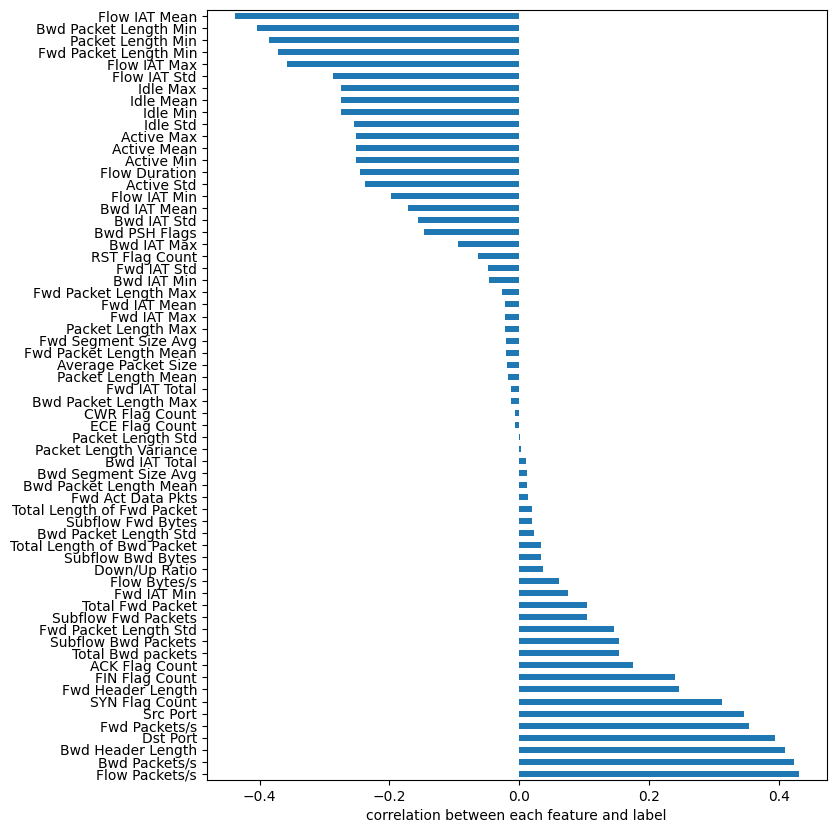

In [ ]:
#label encoding
data['Stage'] = data['Stage'].replace(['benign'], 0)
data['Stage'] = data['Stage'].replace(['reconnaissance'], 1)
data['Stage'] = data['Stage'].replace(['establish foothold'], 2)
data['Stage'] = data['Stage'].replace(['lateral movement'], 3)
data['Stage'] = data['Stage'].replace(['data exfiltration'], 4)
#correlation graph between feature and class label
data.corr(method='spearman')['Stage'].sort_values(ascending=False).iloc[1:].plot(kind='barh',figsize=(8,10))
plt.xlabel("correlation between each feature and label")
plt.show()

In [ ]:
X=data.drop(columns ='Stage')

In [ ]:
Y= data['Stage']

In [ ]:
#split data for traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 42, stratify=Y, test_size=0.2)


# **Feature selection**

### *1. Feature selection using Extra Trees classifier*

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
featureModel=ExtraTreesClassifier(criterion="entropy", verbose=1)
results=featureModel.fit(X_train,Y_train.values.ravel())
columns=pd.Series(data.columns[:-1])
features=pd.Series(results.feature_importances_)

featureRel=pd.concat([columns,features],axis=1)
featureRel.columns=['Column','Score']
featureRel.sort_values(by=['Score'],ascending=False,inplace=True)

#Displaying the most important features of teh dataset.
featureRel

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished


,Column,Score
0,Src Port,0.133529
1,Dst Port,0.108612
42,SYN Flag Count,0.062811
47,Down/Up Ratio,0.044790
35,Bwd Packets/s,0.043961
...,...,...
56,Active Mean,0.000722
59,Active Min,0.000677
57,Active Std,0.000336
46,ECE Flag Count,0.000006


In [ ]:
#Select 22 important features by using Extra Trees classifier
columns_extree = featureRel['Column'][0:21]
columns_extree=columns_extree.values
columns_extree

array(['Src Port', 'Dst Port', 'SYN Flag Count', 'Down/Up Ratio',
       'Bwd Packets/s', 'ACK Flag Count', 'Flow Packets/s',
       'FIN Flag Count', 'Flow Duration', 'Fwd IAT Total',
       'Fwd Act Data Pkts', 'Fwd Packets/s', 'Bwd Header Length',
       'Packet Length Min', 'Bwd Segment Size Avg', 'Fwd Header Length',
       'Flow IAT Min', 'Flow IAT Max', 'Bwd IAT Total',
       'Fwd Packet Length Mean', 'Total Fwd Packet'], dtype=object)

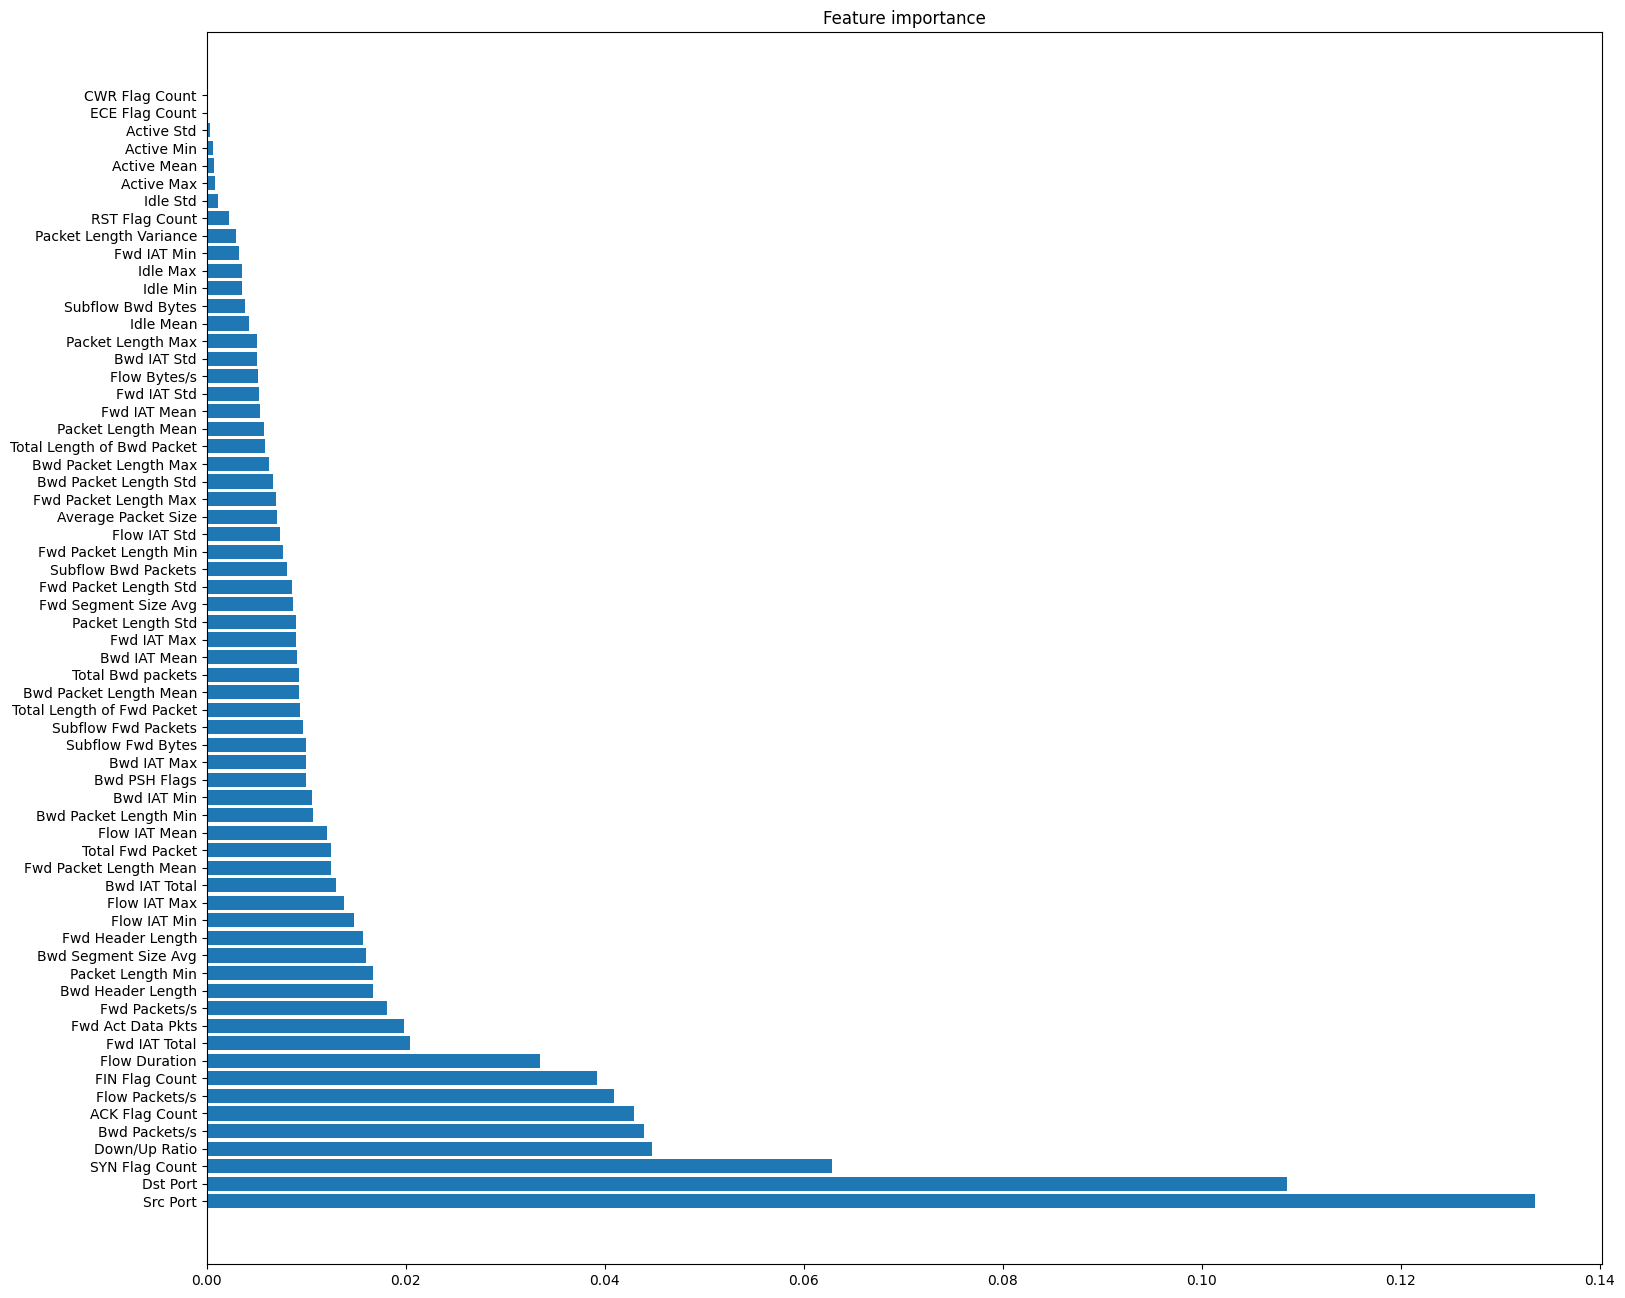

In [ ]:
#feature importance chart by using Extra Trees classifier
fig, ax = plt.subplots(figsize =(18, 16))
ax.barh(featureRel.Column, featureRel.Score)
ax.set_title('Feature importance')
plt.show()

### *2. Feature selection using Spearman correlation*







In [ ]:
#select features with correlation > 0.25 or < -0.25
columns_cor =[]
for (i, j) in dict(data.corr(method='spearman')['Stage'].sort_values(ascending=False).iloc[1:]).items():
        if j > 0.25 or j < -0.25:
            columns_cor.append(i)

In [ ]:
# important features by using Spearman correlation
columns_cor

['Flow Packets/s',
 'Bwd Packets/s',
 'Bwd Header Length',
 'Dst Port',
 'Fwd Packets/s',
 'Src Port',
 'SYN Flag Count',
 'Active Min',
 'Active Mean',
 'Active Max',
 'Idle Std',
 'Idle Min',
 'Idle Mean',
 'Idle Max',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd Packet Length Min',
 'Packet Length Min',
 'Bwd Packet Length Min',
 'Flow IAT Mean']

### *3. Feature selection using ANOVA*

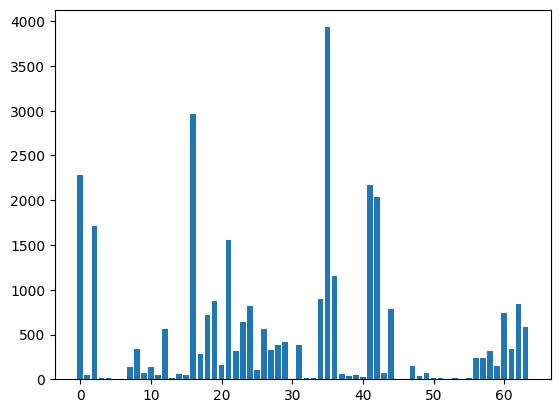

In [ ]:
#Select 21 important features by using ANOVA
anova = SelectKBest(score_func = f_classif, k = 21)
anova.fit(X_train, Y_train)
#ANOVA feature importance chart
plt.bar([i for i in range(len(anova.scores_))], anova.scores_)
plt.show()

In [ ]:
# ANOVA feature important
columns_anova= anova.get_feature_names_out(X.columns)
columns_anova

array(['Src Port', 'Flow Duration', 'Bwd Packet Length Min',
       'Flow Packets/s', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total',
       'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Std',
       'Bwd IAT Max', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'FIN Flag Count', 'SYN Flag Count',
       'ACK Flag Count', 'Idle Mean', 'Idle Max', 'Idle Min'],
      dtype=object)

In [ ]:
#Select the features that appear at least 2 times in 3 models (extra tree, Spearman correlation, ANOVA)
select_columns =[]
for a in columns_extree:
 for b in columns_cor:
  for c in columns_anova:
   if (a==b):
     select_columns.append(a)
   if (b==c):
     select_columns.append(b)
   if (a==c):
     select_columns.append(c)
select_columns=list(dict.fromkeys(select_columns))

In [ ]:
select_columns

['Src Port',
 'Flow Packets/s',
 'Bwd Packets/s',
 'Fwd Packets/s',
 'SYN Flag Count',
 'Idle Min',
 'Idle Mean',
 'Idle Max',
 'Flow IAT Std',
 'Flow IAT Max',
 'Packet Length Min',
 'Bwd Packet Length Min',
 'Dst Port',
 'ACK Flag Count',
 'FIN Flag Count',
 'Flow Duration',
 'Fwd IAT Total',
 'Bwd Header Length',
 'Bwd IAT Total']

In [ ]:
X = X[select_columns]

In [ ]:
#X after selecting features
X

,Src Port,Flow Packets/s,Bwd Packets/s,Fwd Packets/s,SYN Flag Count,Idle Min,Idle Mean,Idle Max,Flow IAT Std,Flow IAT Max,Packet Length Min,Bwd Packet Length Min,Dst Port,ACK Flag Count,FIN Flag Count,Flow Duration,Fwd IAT Total,Bwd IAT Total,Flow IAT Mean,Bwd Header Length
0,22,7.427727,4.874446,2.553281,0,0.0,0.0,0.0,3.286789e+05,1124015.0,0.0,0.0,54587,1,0,4308182,4307335.0,4308182.0,1.389736e+05,672
1,33388,78.186847,48.866779,29.320068,1,0.0,0.0,0.0,2.474857e+04,50854.0,0.0,0.0,80,0,0,102319,51364.0,102319.0,1.461700e+04,176
2,68,0.752037,0.008356,0.743681,0,0.0,0.0,0.0,9.996584e+05,3285675.0,288.0,289.0,67,0,0,119674949,119204338.0,0.0,1.344662e+06,8
3,0,2.075016,0.008333,2.066683,0,0.0,0.0,0.0,2.691121e+05,1000382.0,0.0,0.0,0,0,0,119999065,118999045.0,0.0,4.838672e+05,0
4,54312,0.317347,0.145073,0.172274,0,10025811.0,10187129.3,10224606.0,4.596748e+06,10224606.0,0.0,0.0,80,1,0,110289343,110256187.0,110289343.0,3.243804e+06,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,53452,0.332268,0.066454,0.265814,1,8032072.0,8032072.0,8032072.0,3.109253e+06,8032072.0,0.0,0.0,58425,0,0,15048093,14049925.0,0.0,3.762023e+06,40
2614,54174,0.332044,0.066409,0.265635,1,8029929.0,8029929.0,8029929.0,3.108419e+06,8029929.0,0.0,0.0,48532,0,0,15058240,14058714.0,0.0,3.764560e+06,40
2615,35168,0.332459,0.066492,0.265967,1,8019764.0,8019764.0,8019764.0,3.103199e+06,8019764.0,0.0,0.0,44591,0,0,15039436,14039646.0,0.0,3.759859e+06,40
2616,51298,0.332122,0.066424,0.265698,1,8023635.0,8023635.0,8023635.0,3.103388e+06,8023635.0,0.0,0.0,22351,0,0,15054694,14047720.0,0.0,3.763674e+06,40


In [ ]:
data_process=pd.concat([X,Y],axis=1)
data_process

,Src Port,Flow Packets/s,Bwd Packets/s,Fwd Packets/s,SYN Flag Count,Idle Min,Idle Mean,Idle Max,Flow IAT Std,Flow IAT Max,...,Bwd Packet Length Min,Dst Port,ACK Flag Count,FIN Flag Count,Flow Duration,Fwd IAT Total,Bwd IAT Total,Flow IAT Mean,Bwd Header Length,Stage
0,22,7.427727,4.874446,2.553281,0,0.0,0.0,0.0,3.286789e+05,1124015.0,...,0.0,54587,1,0,4308182,4307335.0,4308182.0,1.389736e+05,672,0
1,33388,78.186847,48.866779,29.320068,1,0.0,0.0,0.0,2.474857e+04,50854.0,...,0.0,80,0,0,102319,51364.0,102319.0,1.461700e+04,176,0
2,68,0.752037,0.008356,0.743681,0,0.0,0.0,0.0,9.996584e+05,3285675.0,...,289.0,67,0,0,119674949,119204338.0,0.0,1.344662e+06,8,0
3,0,2.075016,0.008333,2.066683,0,0.0,0.0,0.0,2.691121e+05,1000382.0,...,0.0,0,0,0,119999065,118999045.0,0.0,4.838672e+05,0,0
4,54312,0.317347,0.145073,0.172274,0,10025811.0,10187129.3,10224606.0,4.596748e+06,10224606.0,...,0.0,80,1,0,110289343,110256187.0,110289343.0,3.243804e+06,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,53452,0.332268,0.066454,0.265814,1,8032072.0,8032072.0,8032072.0,3.109253e+06,8032072.0,...,0.0,58425,0,0,15048093,14049925.0,0.0,3.762023e+06,40,0
2614,54174,0.332044,0.066409,0.265635,1,8029929.0,8029929.0,8029929.0,3.108419e+06,8029929.0,...,0.0,48532,0,0,15058240,14058714.0,0.0,3.764560e+06,40,0
2615,35168,0.332459,0.066492,0.265967,1,8019764.0,8019764.0,8019764.0,3.103199e+06,8019764.0,...,0.0,44591,0,0,15039436,14039646.0,0.0,3.759859e+06,40,0
2616,51298,0.332122,0.066424,0.265698,1,8023635.0,8023635.0,8023635.0,3.103388e+06,8023635.0,...,0.0,22351,0,0,15054694,14047720.0,0.0,3.763674e+06,40,0


In [ ]:
##split data for traning and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 42, stratify=Y, test_size=0.2)

In [ ]:
X_train

,Src Port,Flow Packets/s,Bwd Packets/s,Fwd Packets/s,SYN Flag Count,Idle Min,Idle Mean,Idle Max,Flow IAT Std,Flow IAT Max,Packet Length Min,Bwd Packet Length Min,Dst Port,FIN Flag Count,ACK Flag Count,Flow Duration,Fwd IAT Total,Bwd IAT Total,Flow IAT Mean,Bwd Header Length
5029,43079,285.245668,213.934251,71.311417,0,0.0,0.0,0.0,8.033868e+03,13951.0,45.0,45.0,53,0,0,14023,0.0,14023.0,4674.333333,24
5520,57274,286.697248,215.022936,71.674312,0,0.0,0.0,0.0,7.981641e+03,13867.0,45.0,45.0,53,0,0,13952,0.0,13952.0,4650.666667,24
5027,50944,133333.333333,133333.333333,0.000000,1,0.0,0.0,0.0,0.000000e+00,15.0,0.0,0.0,1113,0,0,15,0.0,15.0,15.000000,44
3164,34479,117647.058824,117647.058824,0.000000,1,0.0,0.0,0.0,0.000000e+00,17.0,0.0,0.0,5961,0,0,17,0.0,17.0,17.000000,44
2064,40040,744.293748,496.195832,248.097916,1,0.0,0.0,0.0,3.915251e+03,11199.0,0.0,0.0,3306,0,0,12092,11667.0,12092.0,1511.500000,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0,2.259823,0.008401,2.251422,0,0.0,0.0,0.0,3.394250e+05,1546388.0,0.0,0.0,0,0,0,119035889,118899529.0,0.0,444163.764925,0
13772,43305,281.670305,211.252729,70.417576,0,0.0,0.0,0.0,8.067452e+03,14049.0,45.0,45.0,53,0,0,14201,0.0,14201.0,4733.666667,24
10133,20441,2.157567,1.372997,0.784570,1,0.0,0.0,0.0,1.557311e+06,4941524.0,0.0,0.0,9002,0,0,5098336,144822.0,5098336.0,509833.600000,164
444,0,2.059719,0.008373,2.051346,0,0.0,0.0,0.0,3.374199e+05,1567105.0,0.0,0.0,0,0,0,119433791,118435061.0,0.0,487484.861224,0


In [ ]:
Y_test.value_counts()

0    12743
1     2382
2     1721
3      490
4        3
Name: Stage, dtype: int64

# **TRAINING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# criterion
criteria = [ 'gini','entropy']

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#k cross validation with k = 4
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=4,random_state=5)

In [ ]:
#GridsearchCV :Tuning the hyper-parameters
rf_Grid = GridSearchCV(estimator = rfc, param_grid = param, cv = skf, scoring= 'accuracy', verbose=2, n_jobs = 4)
rf_Grid.fit(X_train,Y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=5, test_size=None,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 87, 125, 162, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
#values for all parameters
rf_Grid.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 162,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#model building
rfc=RandomForestClassifier(n_estimators= 162,
     min_samples_split=2,
     min_samples_leaf=1,
     max_features='auto',
     max_depth= 15,
     bootstrap= False,
     criterion= 'gini',
     random_state=42)

In [ ]:
#training and prediction
rfc.fit(X_train, Y_train)
Y_pre = rfc.predict(X_test)
print(classification_report(Y_pre, Y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12784
           1       0.98      0.98      0.98      2373
           2       0.98      0.99      0.99      1706
           3       0.87      0.90      0.89       474
           4       0.67      1.00      0.80         2

    accuracy                           0.99     17339
   macro avg       0.90      0.97      0.93     17339
weighted avg       0.99      0.99      0.99     17339



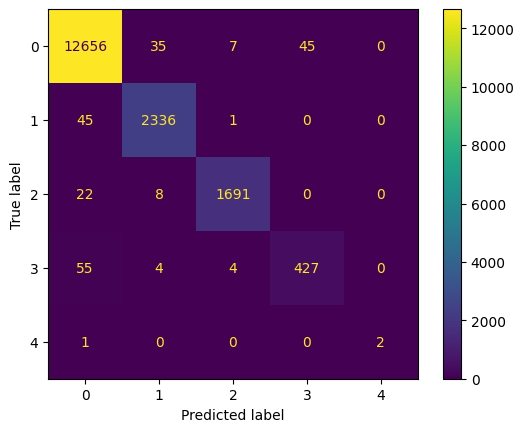

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(Y_test, Y_pre)

cm_display = ConfusionMatrixDisplay(matrix).plot()

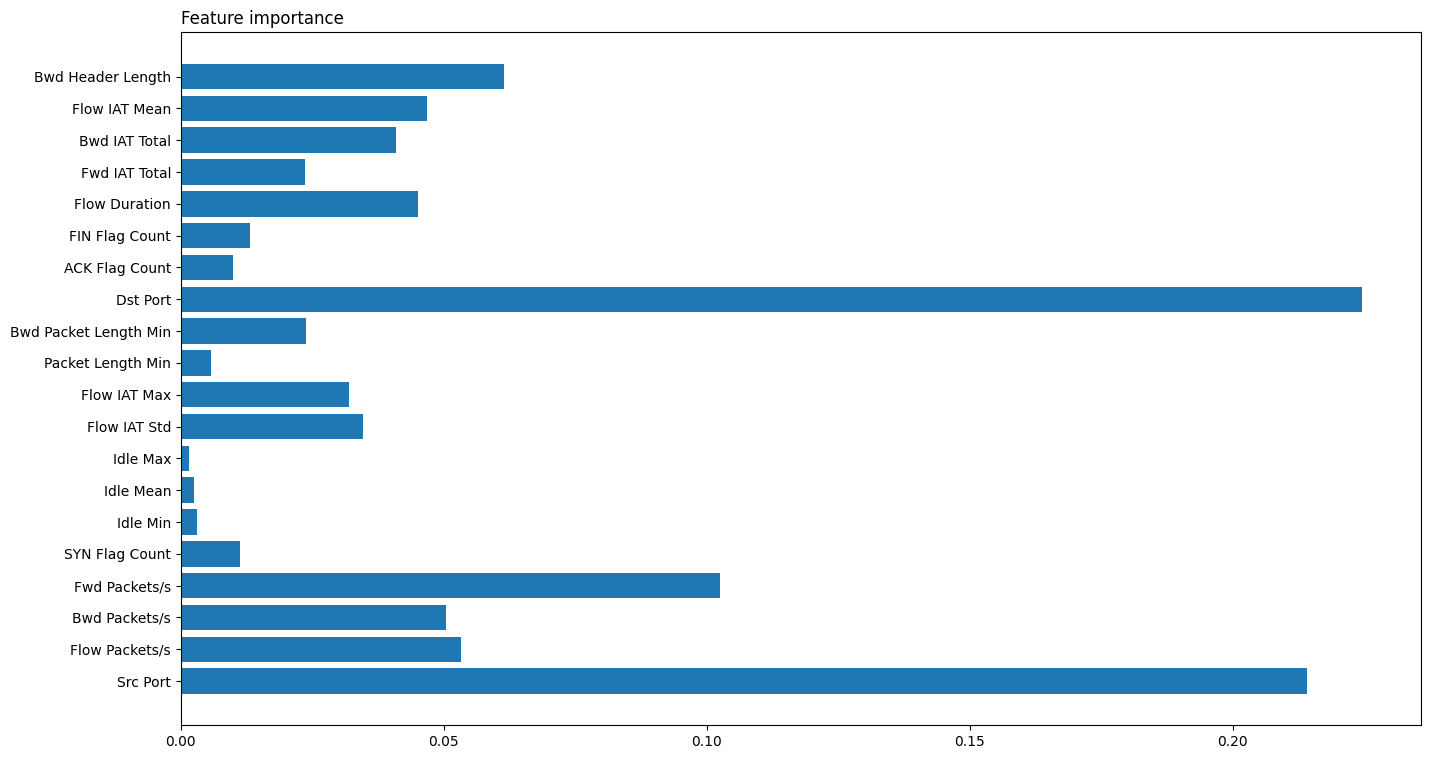

In [ ]:
#importance of features to the model
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(X.columns, rfc.feature_importances_)
ax.set_title('Feature importance', loc ='left', )

    # Show Plot
plt.show()

In [ ]:
#remove unimportant features
X_train.drop(columns=['Idle Max','Idle Mean','Idle Min'],axis=1,inplace = True)
X_test.drop(columns=['Idle Max','Idle Mean','Idle Min'],axis=1,inplace = True)

In [ ]:
#training and prediction after removing unimportant features
rfc.fit(X_train, Y_train)
Y_pre = rfc.predict(X_test)
print(classification_report(Y_pre, Y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12772
           1       0.98      0.99      0.98      2378
           2       0.99      0.99      0.99      1707
           3       0.88      0.90      0.89       480
           4       0.67      1.00      0.80         2

    accuracy                           0.99     17339
   macro avg       0.90      0.97      0.93     17339
weighted avg       0.99      0.99      0.99     17339



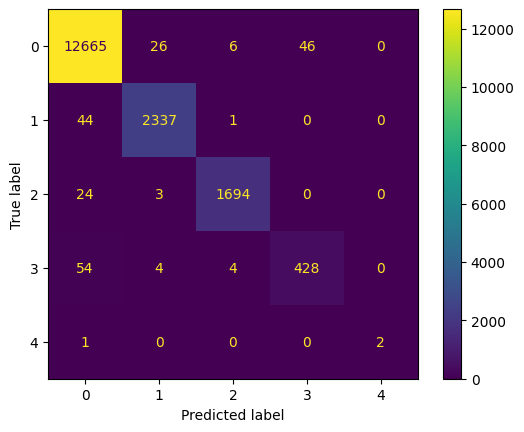

In [ ]:
#confusion_matrix after removing unimportant features
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(Y_test, Y_pre)

cm_display = ConfusionMatrixDisplay(matrix).plot()

In [ ]:
data_generate =pd.read_csv("/content/drive/MyDrive/apt_dataset/synthetic_data.csv")

In [ ]:
data_generate

,Unnamed: 0,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Stage,label
0,0,50906,80,26020699,294,403,117032.0,287666.0,1675.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
1,1,46170,9000,474343,287,506,19070.0,262834.0,296.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
2,2,39284,9000,337072,279,460,15316.0,168906.0,259.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
3,3,46172,9000,445834,335,514,20493.0,302454.0,398.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
4,4,46224,9000,360514,301,485,20768.0,154965.0,262.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17051,17051,34788,9200,117416756,31,27,58015.0,7222.0,6040.0,0.0,...,2.307968e+05,4.443231e+05,1014695.0,5928.0,1.280467e+07,7.714929e+06,25040563.0,7015912.0,0,1
17052,17052,49140,9200,113098350,70,59,114359.0,13242.0,6033.0,0.0,...,4.018205e+06,1.888813e+06,8024818.0,3011382.0,6.989882e+06,7.440597e+03,6998440.0,6972432.0,0,1
17053,17053,0,0,60003287,1,1,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,6.000329e+07,0.000000e+00,60003287.0,60003287.0,0,1
17054,17054,52206,22,106571873,144,127,888.0,27704.0,88.0,0.0,...,4.325457e+06,4.493374e+06,7502752.0,1148162.0,4.791931e+07,2.817712e+07,67843543.0,27995073.0,0,1


In [ ]:
data_generate.describe()

,Unnamed: 0,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Stage,label
count,17056.000000,17056.000000,17056.000000,1.705600e+04,17056.000000,17056.000000,1.705600e+04,1.705600e+04,17056.000000,17056.000000,...,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,17056.000000,17056.0
mean,8527.500000,40040.343515,7949.755101,2.005989e+07,51.543269,32.213180,4.357908e+03,1.909737e+04,206.914810,20.539048,...,5.064840e+05,2.094666e+05,7.452694e+05,2.984589e+05,3.636889e+06,5.739981e+05,4.294152e+06,3.071544e+06,0.426419,1.0
std,4923.787431,18781.863284,13694.033528,4.116166e+07,3335.861866,1669.343818,1.960982e+05,2.492626e+05,605.833456,50.438693,...,2.651518e+06,9.756141e+05,3.271596e+06,1.986400e+06,1.082634e+07,2.405080e+06,1.208982e+07,1.022113e+07,0.786863,0.0
min,0.000000,0.000000,0.000000,9.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0
25%,4263.750000,36432.000000,53.000000,3.580000e+02,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0
50%,8527.500000,47256.000000,1120.500000,1.527350e+04,1.000000,3.000000,4.500000e+01,1.900000e+02,45.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0
75%,12791.250000,53348.000000,9002.000000,1.330945e+06,8.000000,5.000000,5.397500e+02,4.630000e+02,120.000000,44.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.0
max,17055.000000,65047.000000,64756.000000,1.199999e+08,435592.000000,217809.000000,2.558420e+07,1.016718e+07,6040.000000,289.000000,...,2.356256e+07,1.449238e+07,3.537831e+07,2.355884e+07,6.000329e+07,3.007028e+07,6.784354e+07,6.000329e+07,4.000000,1.0


0    12482
1     2367
2     1718
3      486
4        3
Name: Stage, dtype: int64
Axes(0.125,0.11;0.775x0.77)


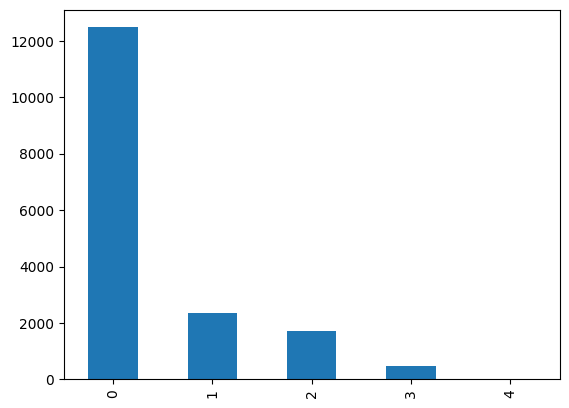

In [ ]:
#class label distribution
print(data_generate.Stage.value_counts())
print(data_generate.Stage.value_counts().plot(kind='bar'))

In [ ]:
data_generate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17056 entries, 0 to 17055
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  17056 non-null  int64  
 1   Src Port                    17056 non-null  int64  
 2   Dst Port                    17056 non-null  int64  
 3   Flow Duration               17056 non-null  int64  
 4   Total Fwd Packet            17056 non-null  int64  
 5   Total Bwd packets           17056 non-null  int64  
 6   Total Length of Fwd Packet  17056 non-null  float64
 7   Total Length of Bwd Packet  17056 non-null  float64
 8   Fwd Packet Length Max       17056 non-null  float64
 9   Fwd Packet Length Min       17056 non-null  float64
 10  Fwd Packet Length Mean      17056 non-null  float64
 11  Fwd Packet Length Std       17056 non-null  float64
 12  Bwd Packet Length Max       17056 non-null  float64
 13  Bwd Packet Length Min       170

In [ ]:
#total missing data
(data_generate.isna().sum()).sum()

0

In [ ]:
X_gen=data_generate.drop(columns ='Stage')

In [ ]:
Y_gen= data_generate['Stage']

In [ ]:
X_gen=X_gen[['Src Port',
 'Flow Packets/s',
 'Bwd Packets/s',
 'Fwd Packets/s',
 'SYN Flag Count',
 'Flow IAT Std',
 'Flow IAT Max',
 'Packet Length Min',
 'Bwd Packet Length Min',
 'Dst Port',
 'ACK Flag Count',
 'FIN Flag Count',
 'Flow Duration',
 'Fwd IAT Total',
 'Bwd Header Length',
 'Bwd IAT Total']]

In [ ]:
X_gen

,Src Port,Flow Packets/s,Bwd Packets/s,Fwd Packets/s,SYN Flag Count,Flow IAT Std,Flow IAT Max,Packet Length Min,Bwd Packet Length Min,Dst Port,ACK Flag Count,FIN Flag Count,Flow Duration,Fwd IAT Total,Bwd Header Length,Bwd IAT Total
0,50906,26.786367,15.487670,11.298697,1,8.351156e+04,452624.0,0.0,0.0,80,0,0,26020699,26009727.0,8084,26008338.0
1,46170,1671.786028,1066.738626,605.047402,1,3.053955e+03,62998.0,0.0,0.0,9000,0,0,474343,472461.0,16208,474343.0
2,39284,2192.409930,1364.693597,827.716334,1,1.947258e+03,44271.0,0.0,0.0,9000,0,0,337072,336357.0,14736,337072.0
3,46172,1904.296218,1152.895472,751.400746,1,2.050616e+03,37484.0,0.0,0.0,9000,0,0,445834,444538.0,16464,444879.0
4,46224,2180.220463,1345.301431,834.919032,1,6.578212e+02,9569.0,0.0,0.0,9000,0,0,360514,359923.0,15536,360514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17051,34788,0.493967,0.229950,0.264017,0,5.529037e+06,25040563.0,0.0,0.0,9200,1,0,117416756,117410411.0,864,117416738.0
17052,49140,1.140600,0.521670,0.618930,0,2.001580e+06,6998440.0,0.0,0.0,9200,1,0,113098350,113086800.0,1888,113098331.0
17053,0,0.033332,0.016666,0.016666,0,0.000000e+00,60003287.0,0.0,0.0,0,0,0,60003287,0.0,0,0.0
17054,52206,2.542885,1.191684,1.351201,0,4.461695e+06,67843543.0,0.0,40.0,22,1,0,106571873,106571336.0,4064,106571621.0


In [ ]:
Y_gen_pre = rfc.predict(X_gen)
print(classification_report(Y_gen_pre, Y_gen))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12508
           1       0.98      0.99      0.98      2364
           2       0.99      0.99      0.99      1705
           3       0.89      0.90      0.90       477
           4       0.67      1.00      0.80         2

    accuracy                           0.99     17056
   macro avg       0.90      0.98      0.93     17056
weighted avg       0.99      0.99      0.99     17056



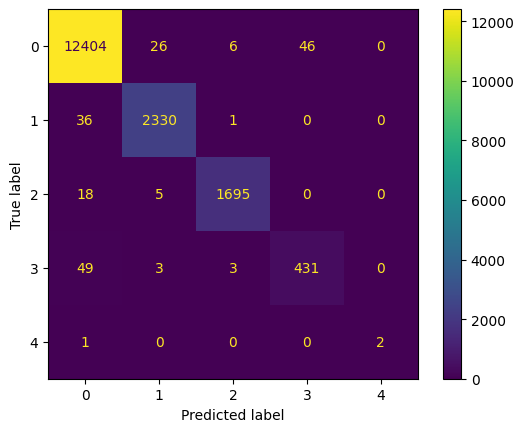

In [ ]:
#confusion_matrix after removing unimportant features
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(Y_gen, Y_gen_pre)

cm_display = ConfusionMatrixDisplay(matrix).plot()